V√©rification des donn√©es


In [138]:
import pandas as pd
import numpy as np


# D√©finition des noms de colonnes d'apr√®s la documentation UCI
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]


# Liste des fichiers
files = [
    "data/processed.cleveland.data",
    "data/processed.hungarian.data",
    "data/processed.switzerland.data",
    "data/processed.va.data"
]

# Charger et fusionner tous les datasets
df_list = [pd.read_csv(f, names=columns) for f in files]
df = pd.concat(df_list, ignore_index=True)

# V√©rifier la taille du nouveau dataset
print(f"Nombre total de lignes apr√®s fusion : {df.shape[0]}")



Nombre total de lignes apr√®s fusion : 920


In [146]:
print(df.info())  # Voir le type des colonnes

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB
None


In [148]:
print(df.isnull().sum())  # V√©rifier les valeurs manquantes


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [61]:
print(df.describe())  # Statistiques g√©n√©rales

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

Nettoyage des valeurs manquantes

In [144]:
# Remplacer les '?' par NaN et convertir en num√©rique
df.replace("?", None, inplace=True)
df = df.apply(pd.to_numeric)

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# V√©rifier si tout est propre
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB
None


In [150]:
 # Remplacer les lignes valeurs manquantes par la moyenne
df["ca"] = df["ca"].fillna(df["ca"].mean())
df["thal"] = df["thal"].fillna(df["thal"].mean())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB
None


Analyse Exploratoire des Donn√©es (EDA)

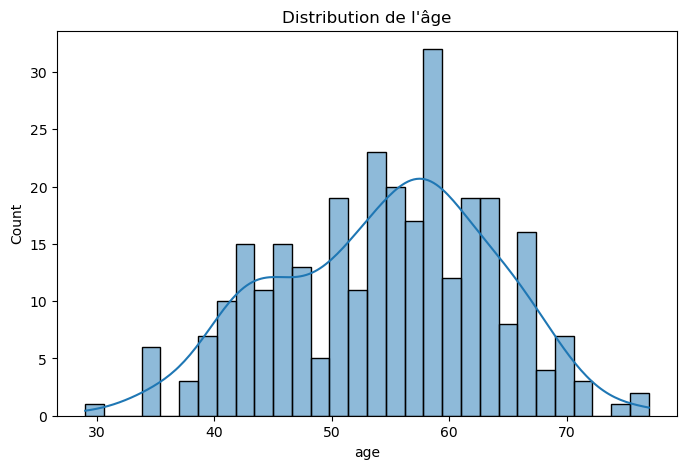

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution de l'√¢ge")
plt.show()


R√©partition des patients malades / non-malades

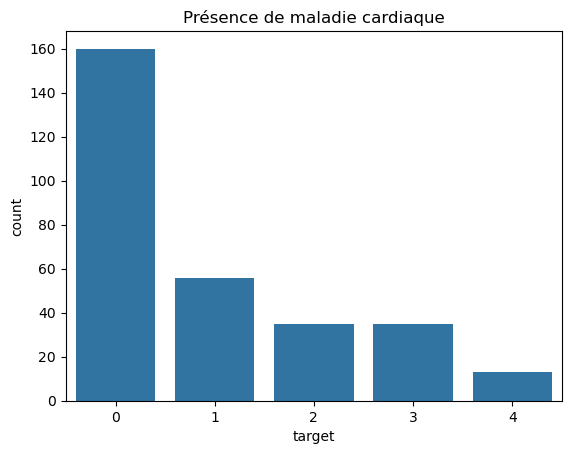

In [154]:
sns.countplot(x=df['target'])
plt.title("Pr√©sence de maladie cardiaque")
plt.show()


Corr√©lation entre certaines variables

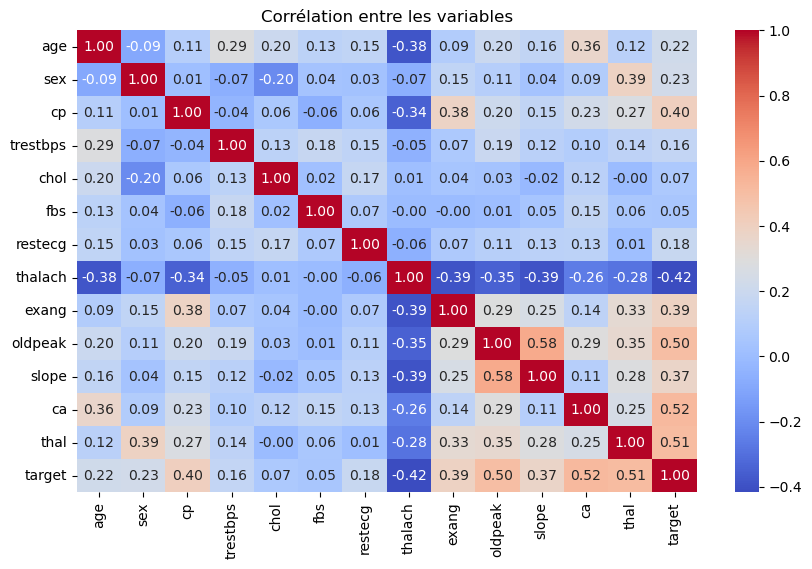

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corr√©lation entre les variables")
plt.show()


Pr√©paration pour le Machine Learning

1Ô∏è‚É£ S√©paration des donn√©es en X (features) et y (cible)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# S√©parer X (features) et y (cible)
X = df.drop(columns=["target"])
y = df["target"]

# Diviser en train/test (80% entra√Ænement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Taille du dataset d'entra√Ænement: {X_train.shape}")
print(f"Taille du dataset de test: {X_test.shape}")


Taille du dataset d'entra√Ænement: (239, 13)
Taille du dataset de test: (60, 13)


Standardiser les donn√©es

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Entra√Ænement des Mod√®les de Machine Learning

On va tester 6 algorithmes et comparer leurs performances :

‚úÖ R√©gression Logistique
‚úÖ K-Nearest Neighbors (KNN)
‚úÖ Support Vector Machine (SVM)
‚úÖ Arbre de d√©cision
‚úÖ Random Forest
‚úÖ Adaboost

1Ô∏è‚É£ Importation des mod√®les

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# D√©finition des mod√®les
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=100),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier()
}

2Ô∏è‚É£ Entra√Ænement et √âvaluation des Mod√®les

In [168]:
# Dictionnaire pour stocker les scores
scores = {}

for name, model in models.items():
    print(f"üîπ Entra√Ænement du mod√®le : {name}")
    model.fit(X_train, y_train)  # Entra√Ænement
    y_pred = model.predict(X_test)  # Pr√©diction sur les donn√©es de test
    
    # Calcul des m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")
    
    # Stocker les scores
    scores[name] = [accuracy, precision, recall, f1, auc_roc]
    
    print(f"‚úÖ {name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC-ROC: {auc_roc:.4f}")
    print("-" * 50)


üîπ Entra√Ænement du mod√®le : Logistic Regression
‚úÖ Logistic Regression - Accuracy: 0.6500, Precision: 0.6660, Recall: 0.6500, F1: 0.6231, AUC-ROC: 0.8159
--------------------------------------------------
üîπ Entra√Ænement du mod√®le : K-Nearest Neighbors
‚úÖ K-Nearest Neighbors - Accuracy: 0.6167, Precision: 0.7146, Recall: 0.6167, F1: 0.5065, AUC-ROC: 0.8322
--------------------------------------------------
üîπ Entra√Ænement du mod√®le : Support Vector Machine
‚úÖ Support Vector Machine - Accuracy: 0.6000, Precision: 0.5841, Recall: 0.6000, F1: 0.5585, AUC-ROC: 0.8046
--------------------------------------------------
üîπ Entra√Ænement du mod√®le : Decision Tree
‚úÖ Decision Tree - Accuracy: 0.5500, Precision: 0.5595, Recall: 0.5500, F1: 0.5522, AUC-ROC: 0.5922
--------------------------------------------------
üîπ Entra√Ænement du mod√®le : Random Forest
‚úÖ Random Forest - Accuracy: 0.6333, Precision: 0.6035, Recall: 0.6333, F1: 0.5836, AUC-ROC: 0.7970
-------------------

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


‚úÖ AdaBoost - Accuracy: 0.4833, Precision: 0.6075, Recall: 0.4833, F1: 0.5125, AUC-ROC: 0.6821
--------------------------------------------------


Choix du mod√®le :

In [170]:
import joblib

# Sauvegarder le mod√®le KNN
joblib.dump(models["Logistic Regression"], "lr_model.pkl")

# Sauvegarder le scaler (n√©cessaire si les donn√©es ont √©t√© normalis√©es)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']